In [13]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from networkx.algorithms.community.quality import modularity
from networkx.algorithms.community.quality import performance
from operator import itemgetter
from scipy.spatial import distance
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
from math import *

In [14]:
underground = pd.read_csv('dataset/london_flows.csv')
underground.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [15]:
print(underground.head().to_latex(index=False))

\begin{tabular}{llrrrr}
\toprule
station\_origin & station\_destination &  flows &  population &  jobs &    distance \\
\midrule
    Abbey Road &   Bank and Monument &      0 &         599 & 78549 & 8131.525097 \\
    Abbey Road &             Beckton &      1 &         599 &   442 & 8510.121774 \\
    Abbey Road &           Blackwall &      3 &         599 &   665 & 3775.448872 \\
    Abbey Road &        Canary Wharf &      1 &         599 & 58772 & 5086.514220 \\
    Abbey Road &        Canning Town &     37 &         599 & 15428 & 2228.923167 \\
\bottomrule
\end{tabular}



In [16]:
def CalcRSquared(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [17]:
pivot_underground = pd.pivot_table(underground, values="flows", index="station_origin", columns="station_destination", aggfunc=np.sum, margins=True)
OD = pivot_underground.fillna(0)
OD.head()

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,599
Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1224
Acton Town,0.0,0.0,0.0,3.0,17.0,0.0,35.0,0.0,0.0,11.0,...,77.0,3.0,6.0,9.0,0.0,0.0,0.0,0.0,0.0,3745
Aldgate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,...,0.0,0.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,2886
Aldgate East,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,...,24.0,0.0,0.0,12.0,0.0,1.0,0.0,1.0,0.0,3172


(0.0, 10000.0)

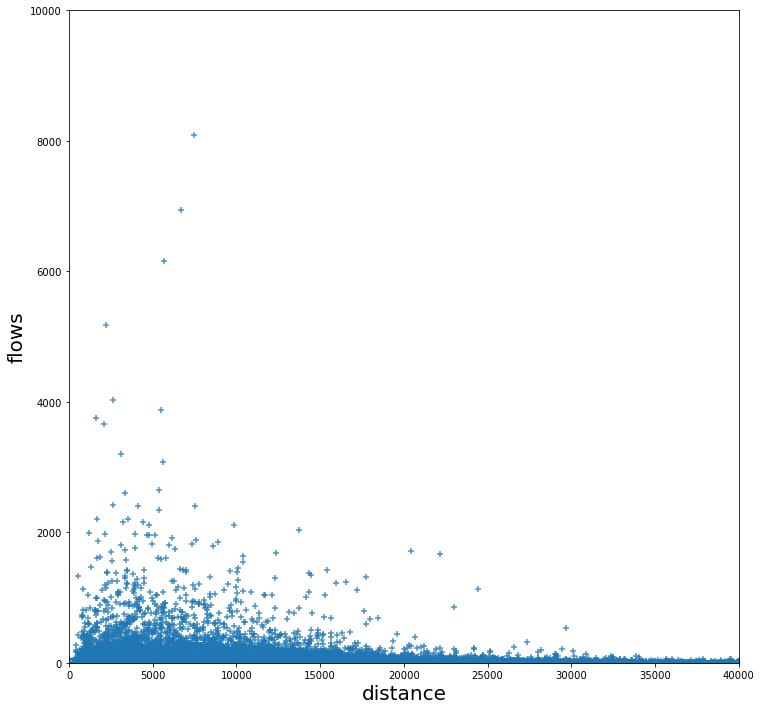

In [18]:
x = underground["distance"]
y = underground["flows"]

#create the subplot
fig, ax = plt.subplots(figsize = (12,12))
#plot the results along with the line of best fit
sns.regplot(x=x, y=y, marker="+", ax=ax)
ax.set_xlabel("distance", fontsize = 20)
ax.set_ylabel("flows", fontsize = 20)
ax.set_xlim([0, 40000])
ax.set_ylim([0, 10000])

In [19]:
london_underground = underground.drop(index = underground.distance[underground.distance == 0].index)
london_underground = underground.drop(index = underground.jobs[underground.jobs == 0].index)
london_underground = underground.drop(index = underground.population[underground.population== 0].index)
print(len(underground), len(london_underground))

61474 61451


In [20]:
underground.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [21]:
for data_item in ["population", "jobs", "distance"]:
    underground[data_item] = underground[data_item].apply(np.log1p)
underground["log_flows"] = underground["flows"].apply(np.log1p)
underground.head()

,station_origin,station_destination,flows,population,jobs,distance,log_flows
0,Abbey Road,Bank and Monument,0,6.39693,11.271491,9.003627,0.000000
1,Abbey Road,Beckton,1,6.39693,6.093570,9.049129,0.693147
2,Abbey Road,Blackwall,3,6.39693,6.501290,8.236539,1.386294
3,Abbey Road,Canary Wharf,1,6.39693,10.981438,8.534545,0.693147
4,Abbey Road,Canning Town,37,6.39693,9.644004,7.709722,3.637586


In [51]:
formula = 'log_flows ~ station_origin + jobs + population + distance-1'
#run a production constrained sim
prodSim = smf.glm(formula = formula, data=underground, family=sm.families.Poisson()).fit()

In [52]:
predictions = prodSim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
underground["prodSimFitted"] = round(predictions_summary_frame["mean"],0)

In [53]:
underground.head()

,station_origin,station_destination,flows,population,jobs,distance,log_flows,prodSimFitted
0,Abbey Road,Bank and Monument,0,6.39693,11.271491,9.003627,0.000000,4.0
1,Abbey Road,Beckton,1,6.39693,6.093570,9.049129,0.693147,1.0
2,Abbey Road,Blackwall,3,6.39693,6.501290,8.236539,1.386294,1.0
3,Abbey Road,Canary Wharf,1,6.39693,10.981438,8.534545,0.693147,4.0
4,Abbey Road,Canning Town,37,6.39693,9.644004,7.709722,3.637586,3.0


In [54]:
CalcRSquared(underground["flows"], underground["prodSimFitted"])

0.11034138010554444

In [55]:
CalcRMSE(underground["flows"], underground["prodSimFitted"])

132.987

In [48]:
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              log_flows   No. Observations:                61474
Model:                            GLM   Df Residuals:                    61073
Model Family:                 Poisson   Df Model:                          400
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -84667.
Date:                Sun, 31 Jul 2022   Deviance:                       56386.
Time:                        23:22:38   Pearson chi2:                 4.72e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5313
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [49]:
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns={0: "alpha_i", "index": "coef"}, inplace=True)
coefs.head()

,coef,alpha_i
0,station_origin[Abbey Road],-0.204372
1,station_origin[Acton Central],0.168310
2,station_origin[Acton Town],0.085865
3,station_origin[Aldgate],-0.681067
4,station_origin[Aldgate East],-0.282659


In [50]:
coefs

,coef,alpha_i
0,station_origin[Abbey Road],-0.204372
1,station_origin[Acton Central],0.168310
2,station_origin[Acton Town],0.085865
3,station_origin[Aldgate],-0.681067
4,station_origin[Aldgate East],-0.282659
...,...,...
397,station_origin[Woodside Park],0.120751
398,station_origin[Woolwich Arsenal],0.796250
399,population,0.085490
400,jobs,0.327686


In [62]:
cdata = pd.read_csv("dataset/london_flows.csv")
cdata.rename(columns={"population":"Oi_pop","jobs":"Dj_job","distance":"Dist"},inplace = True)
cdata = cdata[cdata['Oi_pop']!=0]
cdata = cdata[cdata['Dj_job']!=0]
cdata = cdata[cdata['Dist']!=0]

#take the variables and produce logarithms of them
x_variables = ["Oi_pop", "Dj_job", "Dist"]
log_x_vars = []
for x in x_variables:
    cdata[f"log_{x}"] = np.log(cdata[x])
    log_x_vars.append(f"log_{x}")

In [68]:
def get_result(formula):
    cdata = pd.read_csv("dataset/london_flows.csv")
    cdata.rename(columns={"population":"Oi_pop","jobs":"Dj_job","distance":"Dist"},inplace = True)
    cdata = cdata[cdata['Oi_pop']!=0]
    cdata = cdata[cdata['Dj_job']!=0]
    cdata = cdata[cdata['Dist']!=0]

    #take the variables and produce logarithms of them
    x_variables = ["Oi_pop", "Dj_job", "Dist"]
    log_x_vars = []
    for x in x_variables:
        cdata[f"log_{x}"] = np.log(cdata[x])
        log_x_vars.append(f"log_{x}")
    prodSim = smf.glm(formula = formula, data=cdata, family=sm.families.Poisson()).fit()
    predictions = prodSim.get_prediction()
    predictions_summary_frame = predictions.summary_frame()
    cdata["prodSimFitted"] = round(predictions_summary_frame["mean"],0)
    cdatamat1 = cdata.pivot_table(values ="prodSimFitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
    print("RSquared:", CalcRSquared(cdata["flows"], cdata["prodSimFitted"]), "RMSE:", CalcRMSE(cdata["flows"], cdata["prodSimFitted"]))
    summary = prodSim.summary()
    return cdata, cdatamat1, summary

In [63]:
formula = 'flows ~ station_origin + log_Dj_job + log_Dist-1'
prodSim = smf.glm(formula = formula, data=cdata, family=sm.families.Poisson()).fit()
predictions = prodSim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
cdata["prodSimFitted"] = round(predictions_summary_frame["mean"],0)

In [64]:
cdatamat1 = cdata.pivot_table(values ="prodSimFitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
cdatamat1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,16.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3749.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2882.0
Aldgate East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4866.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [65]:
print(CalcRSquared(cdata["flows"], cdata["prodSimFitted"]), CalcRMSE(cdata["flows"], cdata["prodSimFitted"]))

0.3882763950178627 102.893


In [66]:
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns={0: "alpha_i", "index": "coef"}, inplace=True)
coefs

,coef,alpha_i
0,station_origin[Abbey Road],3.250242
1,station_origin[Acton Central],5.016902
2,station_origin[Acton Town],4.562892
3,station_origin[Aldgate],3.323767
4,station_origin[Aldgate East],3.457664
...,...,...
395,station_origin[Woodgrange Park],5.254667
396,station_origin[Woodside Park],4.698635
397,station_origin[Woolwich Arsenal],6.905590
398,log_Dj_job,0.768616


In [67]:
prodSim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61013
Model Family:                 Poisson   Df Model:                          399
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0169e+06
Date:                Sun, 31 Jul 2022   Deviance:                   1.8615e+06
Time:                        23:32:04   Pearson chi2:                 2.78e+06
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
station_origin[Abbey Road]                      3.2502      0.042     76.939      0.000       3.167       3.333
station_origin[Acton Central]                   5.0169      0.031    162.460      0.000       4.956       5.077
station_origin[Acton Town]                      4.5629      0.020    224.184      0.000       4.523       4.603
station_origin[Aldgate]                         3.3238      0.022    153.538      0.000       3.281       3.366
station_origin[Aldgate East]                    3.4577      0.021    164.937      0.000       3.417       3.499
station_origin[All Saints]                      3.3806      0.038     88.249      0.000       3.306       3.456
station_origin[Alperton]                        4.1759      0.028    150.076      0.000       4.121       4.230
station_origin[Amersham]                        4.6059      0.032    143.925      0.000       4.543       4.669
station_origin[Anerley]                         5.1608      0.041    125.440      0.000       5.080       5.241
station_origin[Angel]                           3.8365      0.019    200.459      0.000       3.799       3.874
station_origin[Archway]                         4.7027      0.018    262.839      0.000       4.668       4.738
station_origin[Arnos Grove]                     4.5646      0.022    207.351      0.000       4.521       4.608
station_origin[Arsenal]                         3.5566      0.024    145.300      0.000       3.509       3.605
station_origin[Baker Street]                    4.3776      0.016    271.995      0.000       4.346       4.409
station_origin[Balham]                          5.4260      0.016    342.811      0.000       5.395       5.457
station_origin[Bank and Monument]               5.4511      0.012    445.883      0.000       5.427       5.475
station_origin[Barbican]                        2.4090      0.030     79.119      0.000       2.349       2.469
station_origin[Barking]                         5.4776      0.017    329.015      0.000       5.445       5.510
station_origin[Barkingside]                     4.0633      0.031    133.040      0.000       4.003       4.123
station_origin[Barons Court]                    4.2168      0.020    216.066      0.000       4.179       4.255
station_origin[Bayswater]                       3.2072      0.028    115.586      0.000       3.153       3.262
station_origin[Beckton]                         4.8932      0.031    155.357      0.000       4.831       4.955
station_origin[Beckton Park]                    3.2395      0.060     54.418      0.000       3.123       3.356
station_origin[Becontree]                       4.4595      0.024    183.691      0.000       4.412       4.507
station_origin[Belsize Park]                    3.9028     

In [77]:
def get_result(formula):
    cdata = pd.read_csv("dataset/london_flows.csv")
    cdata.rename(columns={"population":"Oi_pop","jobs":"Dj_job","distance":"Dist"},inplace = True)
    cdata = cdata[cdata['Oi_pop']!=0]
    cdata = cdata[cdata['Dj_job']!=0]
    cdata = cdata[cdata['Dist']!=0]

    #take the variables and produce logarithms of them
    x_variables = ["Oi_pop", "Dj_job", "Dist"]
    log_x_vars = []
    for x in x_variables:
        cdata[f"log_{x}"] = np.log(cdata[x])
        log_x_vars.append(f"log_{x}")
    prodSim = smf.glm(formula = formula, data=cdata, family=sm.families.Poisson()).fit()
    predictions = prodSim.get_prediction()
    predictions_summary_frame = predictions.summary_frame()
    cdata["prodSimFitted"] = round(predictions_summary_frame["mean"],0)
    cdatamat1 = cdata.pivot_table(values ="prodSimFitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
    print("RSquared:", CalcRSquared(cdata["flows"], cdata["prodSimFitted"]), "RMSE:", CalcRMSE(cdata["flows"], cdata["prodSimFitted"]))
    summary = prodSim.summary()
    return prodSim, cdata, cdatamat1, summary

In [81]:
prodSim, cdata, cdatamat1, summary = get_result(formula="flows ~ log_Oi_pop + log_Dj_job + log_Dist")
summary

RSquared: 0.3211903577361869 RMSE: 108.334


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61409
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2785e+06
Date:                Sun, 31 Jul 2022   Deviance:                   2.3848e+06
Time:                        23:53:01   Pearson chi2:                 4.76e+06
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7475      0.014   -273.078      0.000      -3.774      -3.721
log_Oi_pop     0.7325      0.001   1048.145      0.000       0.731       0.734
log_Dj_job     0.7608      0.001   1163.936      0.000       0.759       0.762
log_Dist      -0.6228      0.001   -674.846      0.000      -0.625      -0.621
==============================================================================
"""

In [84]:
prodSim, cdata, cdatamat1, summary = get_result(formula="flows ~ station_origin + log_Dj_job + log_Dist-1")
alpha_i = prodSim.params[0:-2]
gamma = prodSim.params[-2]
beta = -prodSim.params[-1]
print(gamma, beta)
summary

RSquared: 0.3882763950178627 RMSE: 102.893
0.7686156200124331 0.8781191183724208


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61013
Model Family:                 Poisson   Df Model:                          399
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0169e+06
Date:                Sun, 31 Jul 2022   Deviance:                   1.8615e+06
Time:                        23:55:32   Pearson chi2:                 2.78e+06
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
station_origin[Abbey Road]                      3.2502      0.042     76.939      0.000       3.167       3.333
station_origin[Acton Central]                   5.0169      0.031    162.460      0.000       4.956       5.077
station_origin[Acton Town]                      4.5629      0.020    224.184      0.000       4.523       4.603
station_origin[Aldgate]                         3.3238      0.022    153.538      0.000       3.281       3.366
station_origin[Aldgate East]                    3.4577      0.021    164.937      0.000       3.417       3.499
station_origin[All Saints]                      3.3806      0.038     88.249      0.000       3.306       3.456
station_origin[Alperton]                        4.1759      0.028    150.076      0.000       4.121       4.230
station_origin[Amersham]                        4.6059      0.032    143.925      0.000       4.543       4.669
station_origin[Anerley]                         5.1608      0.041    125.440      0.000       5.080       5.241
station_origin[Angel]                           3.8365      0.019    200.459      0.000       3.799       3.874
station_origin[Archway]                         4.7027      0.018    262.839      0.000       4.668       4.738
station_origin[Arnos Grove]                     4.5646      0.022    207.351      0.000       4.521       4.608
station_origin[Arsenal]                         3.5566      0.024    145.300      0.000       3.509       3.605
station_origin[Baker Street]                    4.3776      0.016    271.995      0.000       4.346       4.409
station_origin[Balham]                          5.4260      0.016    342.811      0.000       5.395       5.457
station_origin[Bank and Monument]               5.4511      0.012    445.883      0.000       5.427       5.475
station_origin[Barbican]                        2.4090      0.030     79.119      0.000       2.349       2.469
station_origin[Barking]                         5.4776      0.017    329.015      0.000       5.445       5.510
station_origin[Barkingside]                     4.0633      0.031    133.040      0.000       4.003       4.123
station_origin[Barons Court]                    4.2168      0.020    216.066      0.000       4.179       4.255
station_origin[Bayswater]                       3.2072      0.028    115.586      0.000       3.153       3.262
station_origin[Beckton]                         4.8932      0.031    155.357      0.000       4.831       4.955
station_origin[Beckton Park]                    3.2395      0.060     54.418      0.000       3.123       3.356
station_origin[Becontree]                       4.4595      0.024    183.691      0.000       4.412       4.507
station_origin[Belsize Park]                    3.9028     

In [ ]:
prodSim, cdata, cdatamat1, summary = get_result(formula="flows ~ station_origin + log_Dj_job + log_Dist-1")
summary

In [75]:
def prepare_cdata():
    cdata = pd.read_csv("dataset/london_flows.csv")
    cdata.rename(columns={"population":"Oi_pop","jobs":"Dj_job","distance":"Dist"},inplace = True)
    cdata = cdata[cdata['Oi_pop']!=0]
    cdata = cdata[cdata['Dj_job']!=0]
    cdata = cdata[cdata['Dist']!=0]

    #take the variables and produce logarithms of them
    x_variables = ["Oi_pop", "Dj_job", "Dist"]
    log_x_vars = []
    for x in x_variables:
        cdata[f"log_{x}"] = np.log(cdata[x])
        log_x_vars.append(f"log_{x}")
    return cdata

def new_job(row):
    if row["station_destination"] == "Canary Wharf":
        val = 1/2*row["Dj_job"]
    else:
        val = row["Dj_job"]
    return val

cdata = prepare_cdata()  
#create a variable called De2_destjob_scenario while applying the new_job function
cdata["De2_destjob_scenario"] = cdata.apply(new_job, axis =1)
#check the result to make sure it has been applied
cdata.head(10)

,station_origin,station_destination,flows,Oi_pop,Dj_job,Dist,log_Oi_pop,log_Dj_job,log_Dist,De2_destjob_scenario
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,78549.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,442.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,665.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,29386.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,15428.0
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,6.395262,7.096721,8.807842,1208.0
6,Abbey Road,Custom House,0,599,845,3824.855630,6.395262,6.739337,8.249276,845.0
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,6.395262,7.466228,9.048280,1748.0
8,Abbey Road,Cyprus,7,599,850,6532.099618,6.395262,6.745236,8.784484,850.0
9,Abbey Road,Devons Road,1,599,611,3958.324171,6.395262,6.415097,8.283576,611.0


In [155]:
cdata = prepare_cdata()
formula = 'flows ~ station_origin + log_Dj_job + log_Dist-1'
prodSim, cdata, cdatamat1, summary = get_result(formula)
O_i = pd.DataFrame(cdata.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
cdata = cdata.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(cdata.groupby(["station_origin"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
cdata = cdata.merge(D_j, on = "station_origin", how = "left" )
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
cdata = cdata.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
cdata.drop(columns = ["coef"], inplace = True)
#check this has worked
cdata.head()

RSquared: 0.3882763950178627 RMSE: 102.893


,station_origin,station_destination,flows,Oi_pop,Dj_job,Dist,log_Oi_pop,log_Dj_job,log_Dist,prodSimFitted,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,55.0,599,599,3.250242
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,1.0,599,599,3.250242
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,3.0,599,599,3.250242
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,66.0,599,599,3.250242
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,49.0,599,599,3.250242


In [156]:
alpha_i = prodSim.params[0:-2]
gamma = prodSim.params[-2]
beta = -prodSim.params[-1]
print(gamma)
print(beta)

0.7686156200124331
0.8781191183724208


In [157]:
cdata["prodsimest1"] = np.exp(cdata["alpha_i"]+gamma*cdata["log_Dj_job"] 
                                 - beta*cdata["log_Dist"])
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
cdata.head()

,station_origin,station_destination,flows,Oi_pop,Dj_job,Dist,log_Oi_pop,log_Dj_job,log_Dist,prodSimFitted,O_i,D_j,alpha_i,prodsimest1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,55.0,599,599,3.250242,55.010681
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,1.0,599,599,3.250242,0.986106
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,3.0,599,599,3.250242,2.755640
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,66.0,599,599,3.250242,66.457296
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,49.0,599,599,3.250242,49.060970


In [158]:
cdata["prodsimest1"] = round(cdata["prodsimest1"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
cdatamat3 = cdata.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat3

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,16.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3749.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2882.0
Aldgate East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4866.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [159]:
def new_sal(row):
    if row["station_destination"] == "Canary Wharf":
        val = row["Dj_job"]*0.5
    else:
        val = row["Dj_job"]
    return val
        
cdata["jobs_b"] = cdata.apply(new_sal, axis =1)
cdata.head(10)

,station_origin,station_destination,flows,Oi_pop,Dj_job,Dist,log_Oi_pop,log_Dj_job,log_Dist,prodSimFitted,O_i,D_j,alpha_i,prodsimest1,jobs_b
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,55.0,599,599,3.250242,55.0,78549.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,1.0,599,599,3.250242,1.0,442.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,3.0,599,599,3.250242,3.0,665.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,66.0,599,599,3.250242,66.0,29386.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,49.0,599,599,3.250242,49.0,15428.0
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,6.395262,7.096721,8.807842,3.0,599,599,3.250242,3.0,1208.0
6,Abbey Road,Custom House,0,599,845,3824.855630,6.395262,6.739337,8.249276,3.0,599,599,3.250242,3.0,845.0
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,6.395262,7.466228,9.048280,3.0,599,599,3.250242,3.0,1748.0
8,Abbey Road,Cyprus,7,599,850,6532.099618,6.395262,6.745236,8.784484,2.0,599,599,3.250242,2.0,850.0
9,Abbey Road,Devons Road,1,599,611,3958.324171,6.395262,6.415097,8.283576,2.0,599,599,3.250242,2.0,611.0


In [160]:
Dj2_gamma = cdata["Dj_job"]**gamma
dist_beta = cdata["Dist"]**beta
#calcualte the first stage of the Ai values
cdata["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cdata.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
cdata = cdata.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [161]:
cdata["prodsimest3"] = cdata["A_i"]*cdata["O_i"]*Dj2_gamma*dist_beta
#round
cdata["prodsimest3"] = round(cdata["prodsimest3"])
#check
cdata[["prodsimest1", "prodsimest3"]]

,prodsimest1,prodsimest3
0,55.0,217.0
1,1.0,4.0
2,3.0,3.0
3,66.0,115.0
4,49.0,20.0
...,...,...
61408,121.0,189.0
61409,259.0,190.0
61410,32.0,27.0
61411,98.0,31.0


In [162]:
Dj3_gamma = cdata["jobs_b"]**gamma
#calcualte the first stage of the Ai values
cdata["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cdata.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
cdata = cdata.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [163]:
cdata["prodsimest4"] = cdata["A_i2"]*cdata["O_i"]*Dj3_gamma*dist_beta
#round
cdata["prodsimest4"] = round(cdata["prodsimest4"])
cdatamat5 = cdata.pivot_table(values ="prodsimest4", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat5

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,27.0,28.0,NaN,2.0,4.0,NaN,26.0,...,22.0,3.0,13.0,3.0,NaN,7.0,NaN,7.0,NaN,3744.0
Aldgate,NaN,NaN,14.0,NaN,4.0,NaN,NaN,6.0,NaN,10.0,...,35.0,NaN,11.0,8.0,NaN,5.0,NaN,6.0,NaN,2886.0
Aldgate East,NaN,NaN,15.0,5.0,NaN,NaN,8.0,7.0,NaN,11.0,...,38.0,6.0,12.0,9.0,NaN,5.0,NaN,7.0,NaN,3182.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,18.0,26.0,24.0,NaN,NaN,NaN,NaN,30.0,...,43.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,4868.0
Woodgrange Park,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,528.0
Woodside Park,NaN,NaN,11.0,20.0,21.0,NaN,6.0,NaN,NaN,18.0,...,26.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,3093.0


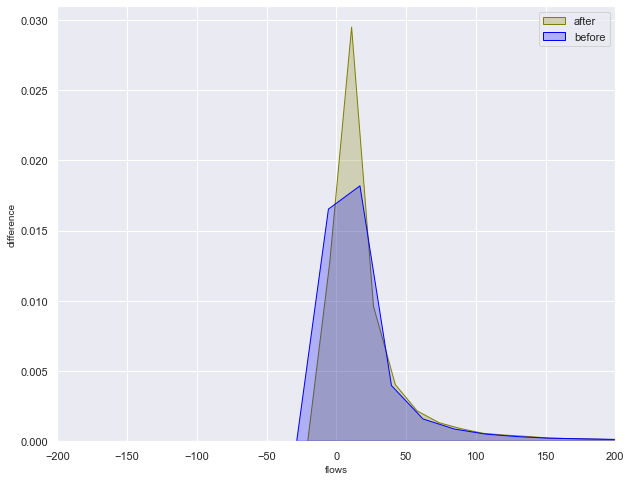

In [168]:
plt.figure(figsize=(10, 8))
# Narrower bandwidth
sns.kdeplot(cdata["prodsimest4"], shade=True, color='olive', label="after") # if using seaborn < 0.11.0
sns.kdeplot(cdata["prodsimest1"], shade=True, color='blue', label="before")
plt.xlim(-200, 200)
plt.xlabel('flows',size=10)
plt.ylabel('difference',size=10)
plt.legend()
plt.show()

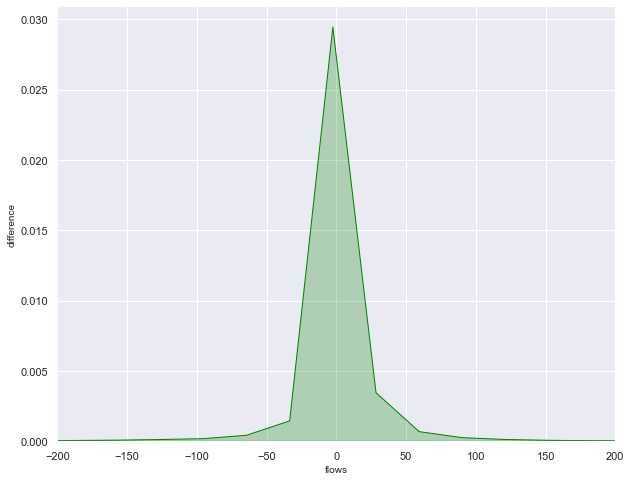

In [169]:
cdata["difference"]=cdata["prodsimest4"]-cdata["prodsimest1"]
sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))
# Narrower bandwidth
sns.kdeplot(cdata["difference"], shade=True, color='green') # if using seaborn < 0.11.0
plt.xlim(-200, 200)
plt.xlabel('flows',size=10)
plt.ylabel('difference',size=10)
plt.show()

In [104]:
CalcRMSE(cdata["prodsimest4"], cdata["flows"])

118.363

In [105]:
CalcRSquared(cdata["prodsimest4"], cdata["flows"])

0.19062944506200974

In [170]:
def calCost(beta):
    cdata = prepare_cdata()
    Dj_gamma1 = cdata["Dj_job"]**gamma
    dist_beta1 = cdata["Dist"]**-beta
    #calcualte the first stage of the Ai values
    cdata["Ai1_new1"] = Dj_gamma1 * dist_beta1
    #now do the sum over all js bit
    A_i_new1 = pd.DataFrame(cdata.groupby(["station_origin"])["Ai1_new1"].agg(np.sum))
    #now divide into 1
    A_i_new1["Ai1_new1"] = 1/A_i_new1["Ai1_new1"]
    A_i_new1.rename(columns={"Ai1_new1":"A_i_new1"}, inplace=True)
    #and write the A_i values back into the dataframe
    cdata = cdata.merge(A_i_new1, left_on="station_origin", right_index=True, how="left")
    O_i = pd.DataFrame(cdata.groupby(["station_origin"])["flows"].agg(np.sum))
    O_i.rename(columns={"flows":"O_i"}, inplace = True)
    cdata = cdata.merge(O_i, on = "station_origin", how = "left" )

    D_j = pd.DataFrame(cdata.groupby(["station_origin"])["flows"].agg(np.sum))
    D_j.rename(columns={"flows":"D_j"}, inplace = True)
    cdata = cdata.merge(D_j, on = "station_origin", how = "left" )
    cdata["prodsimest5"] = cdata["A_i_new1"]*cdata["O_i"]*Dj_gamma1*dist_beta1
    #round
    cdata["prodsimest5"] = round(cdata["prodsimest5"])
    cdatamat5 = cdata.pivot_table(values ="prodsimest5", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
    RMSE = CalcRMSE(cdata["flows"], cdata["prodsimest5"])
    # RSquare = CalcRSquared(cdata["flows"], cdata["prodsimest5"])
    return cdata["prodsimest5"], cdatamat5, RMSE

In [171]:
RMSE_list = []
for i in [0.1, 0.2, 0.5, 0.8, 1, 1.5, 3, 5, 10, 20]:
    pre5, cdatamat5, RMSE = calCost(i)
    print(RMSE)
    RMSE_list.append(RMSE)


138.595
139.281
142.706
150.191
161.028
300.409
56639.767
12611717.133
366571395493.635
1.7851556316057557e+20


In [172]:
a = [0.1, 0.2, 0.5, 0.8, 1, 1.5, 3, 5, 10, 20]
b = RMSE_list
c = pd.DataFrame({"beta":a, "RMSE":b})
print(c.to_latex(index=False))

\begin{tabular}{rr}
\toprule
 beta &         RMSE \\
\midrule
  0.1 & 1.385950e+02 \\
  0.2 & 1.392810e+02 \\
  0.5 & 1.427060e+02 \\
  0.8 & 1.501910e+02 \\
  1.0 & 1.610280e+02 \\
  1.5 & 3.004090e+02 \\
  3.0 & 5.663977e+04 \\
  5.0 & 1.261172e+07 \\
 10.0 & 3.665714e+11 \\
 20.0 & 1.785156e+20 \\
\bottomrule
\end{tabular}



(array([[6.1352e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0

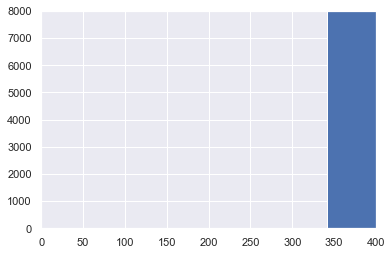

In [196]:
fig, ax = plt.subplots()
res = []
for i in [0.1, 1, 2]:
    pre5, cdatamat5, RMSE = calCost(i)
    res.append(pre5.tolist())

ax.set_xlim(0, 400)
ax.set_ylim(0, 8000)
ax.hist(res, bins=100)

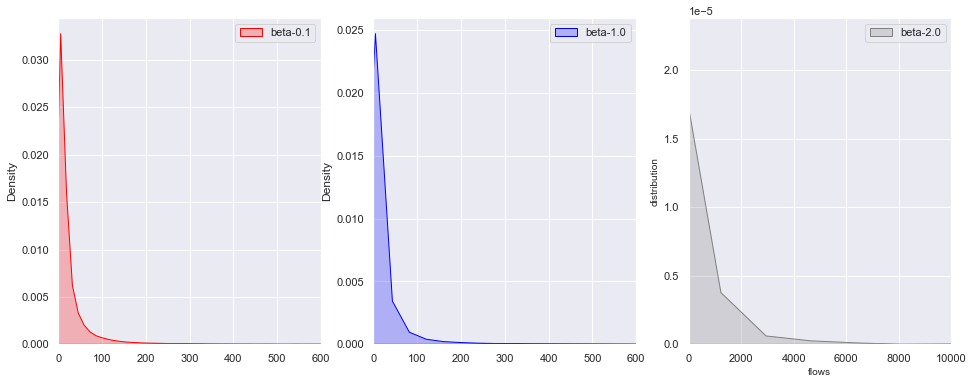

In [198]:
from cProfile import label


sns.set(style="darkgrid")
plt.subplots(1,3, figsize=(16, 6))
# Narrower bandwidth

plt.subplot(131)
sns.kdeplot(res[0], shade=True, color='red', label="beta-0.1")
plt.legend()
plt.xlim(0, 600)
plt.ylim(0, 0.04)
plt.subplot(132)
sns.kdeplot(res[1], shade=True, color='blue', label="beta-1.0")
plt.legend()
plt.xlim(0, 600)
plt.subplot(133)
sns.kdeplot(res[2], shade=True, color='grey', label="beta-2.0")
plt.legend()
plt.xlim(0, 10000)
plt.xlabel('flows',size=10)
plt.ylabel('distribution',size=10)

plt.show()

In [199]:
pre5

0          7.0
1          0.0
2          1.0
3         15.0
4         28.0
         ...  
61408     25.0
61409    258.0
61410     27.0
61411    922.0
61412     84.0
Name: prodsimest5, Length: 61413, dtype: float64